# Decision Trees(car) - Multiclass Classification

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('C:\\Users\\ysaru\\Desktop\\Datasets\\car_evaluation_DT.csv', header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.shape

(1728, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [7]:
for col in col_names:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [7]:
X = df.iloc[:,0:6]
y = df.iloc[:,-1]
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [9]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

In [10]:
#import category_encoders as ce

#encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

#X = encoder.fit_transform(X)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [9]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [10]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
101,1,1,1,1,1,1
844,2,2,1,2,2,2
1361,3,1,2,3,1,1
1584,3,3,2,1,1,3
566,2,4,3,1,2,1


In [14]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


In [15]:
clf_gini.fit(X_train,y_train)
y_pred_gini = clf_gini.predict(X_test)
print('Testing accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Testing accuracy score: 0.7938


In [16]:
y_pred_train_gini = clf_gini.predict(X_train)
print('Training accuracy score: {0:0.4f}'.format(accuracy_score(y_train,y_pred_train_gini)))

Training accuracy score: 0.7808


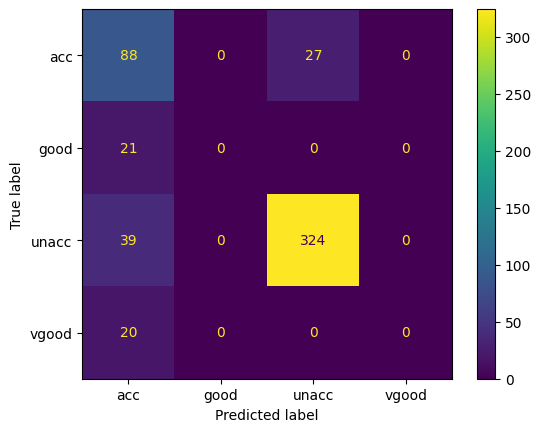

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gini)

In [18]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.52      0.77      0.62       115
        good       0.00      0.00      0.00        21
       unacc       0.92      0.89      0.91       363
       vgood       0.00      0.00      0.00        20

    accuracy                           0.79       519
   macro avg       0.36      0.41      0.38       519
weighted avg       0.76      0.79      0.77       519



C:\Users\ysaru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ysaru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ysaru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Above results
The performance of the above model is very poor, it doesn't classif the labels well. We will examine different tree depths below and try to find a better model

0.961129476584022


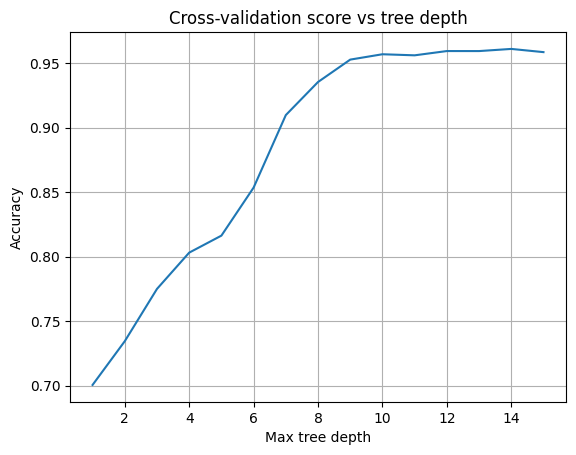

In [19]:
from sklearn.model_selection import cross_val_score

depth = np.arange(1,16,1)
acc_score = []

for i in depth:
    clf=DecisionTreeClassifier(criterion='gini', max_depth=i)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(np.mean(scores))

print(np.max(acc_score))
plt.plot(depth, acc_score)
plt.xlabel('Max tree depth')
plt.ylabel('Accuracy')
plt.title('Cross-validation score vs tree depth')
plt.grid()
plt.show()

In [20]:
clf1 = DecisionTreeClassifier(criterion='gini', max_depth=9, random_state=0)
clf1.fit(X_train,y_train)
y_pred1 = clf1.predict(X_test)
print(accuracy_score(y_test, y_pred1))


0.9595375722543352


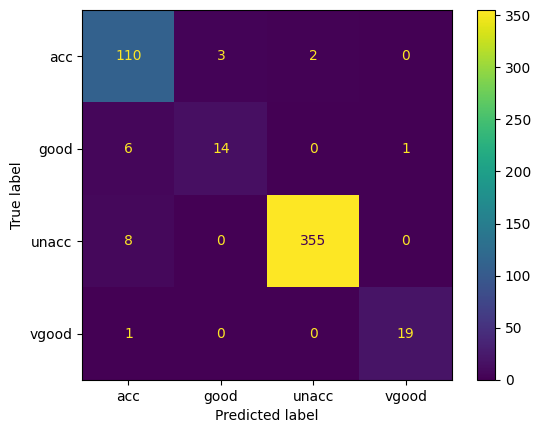

In [21]:
#from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         acc       0.88      0.96      0.92       115
        good       0.82      0.67      0.74        21
       unacc       0.99      0.98      0.99       363
       vgood       0.95      0.95      0.95        20

    accuracy                           0.96       519
   macro avg       0.91      0.89      0.90       519
weighted avg       0.96      0.96      0.96       519



### Above results:
show us that with a max depth of 9 the model performs extremely well. We chose the depth of 9 by looking at the Cross validation score vs max depth plot. This is our final model using Decision Tree.

Below we examine Ensemble learning method RandomForest, learning curve and using entropy as criteria

# Ensemble Learning Methods

## 1) Random Forest
Using Ensemble learning method RanfomForestClassifier (which is an example of "Bagging" method) to see the variation in our  reesults

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='gini')


In [25]:
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))

0.9749518304431599


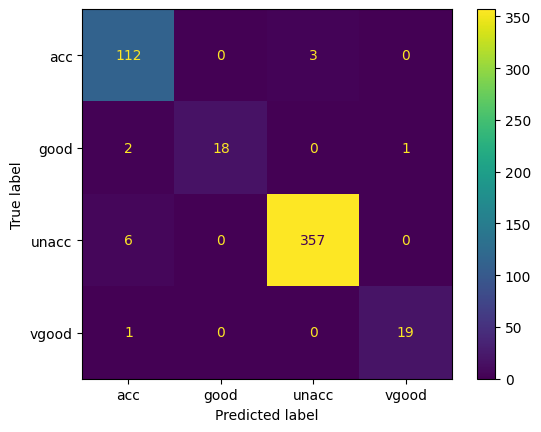

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf)

In [27]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         acc       0.93      0.97      0.95       115
        good       1.00      0.86      0.92        21
       unacc       0.99      0.98      0.99       363
       vgood       0.95      0.95      0.95        20

    accuracy                           0.97       519
   macro avg       0.97      0.94      0.95       519
weighted avg       0.98      0.97      0.97       519



### Learning curve for Decision Tree

**Important Note: Plot learning curves using only training dataset**

In [28]:
train_sizes, train_scores, val_scores = learning_curve(clf1, X_train, y_train, cv=10, train_sizes=np.linspace(0.1,1.0,5),
                                                        scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

train_scores_std = np.std(train_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

In [29]:
val_scores

array([[0.80165289, 0.76033058, 0.76033058, 0.84297521, 0.79338843,
        0.75206612, 0.75206612, 0.7107438 , 0.76859504, 0.79166667],
       [0.85123967, 0.90909091, 0.85950413, 0.90909091, 0.89256198,
        0.8677686 , 0.89256198, 0.81818182, 0.8677686 , 0.88333333],
       [0.91735537, 0.9338843 , 0.94214876, 0.9338843 , 0.90909091,
        0.89256198, 0.95867769, 0.90909091, 0.88429752, 0.88333333],
       [0.95041322, 0.95867769, 0.96694215, 0.92561983, 0.92561983,
        0.94214876, 0.95867769, 0.96694215, 0.95041322, 0.925     ],
       [0.95867769, 0.96694215, 0.96694215, 0.94214876, 0.95867769,
        0.95041322, 0.96694215, 0.92561983, 0.95041322, 0.94166667]])

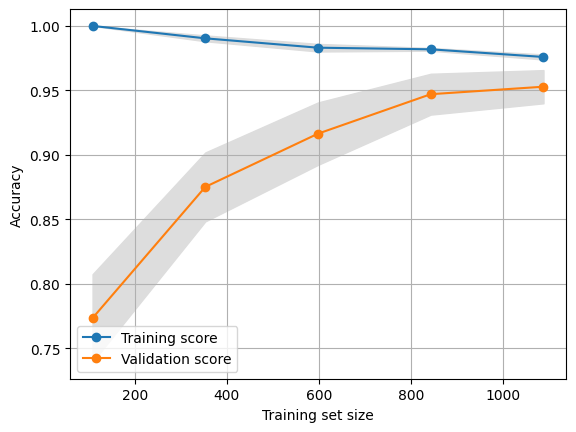

In [31]:
plt.plot(train_sizes, train_scores_mean, label='Training score', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation score', marker='o')

plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, color='#DDD')
plt.fill_between(train_sizes, val_scores_mean-val_scores_std, val_scores_mean+val_scores_std, color='#DDD')

plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

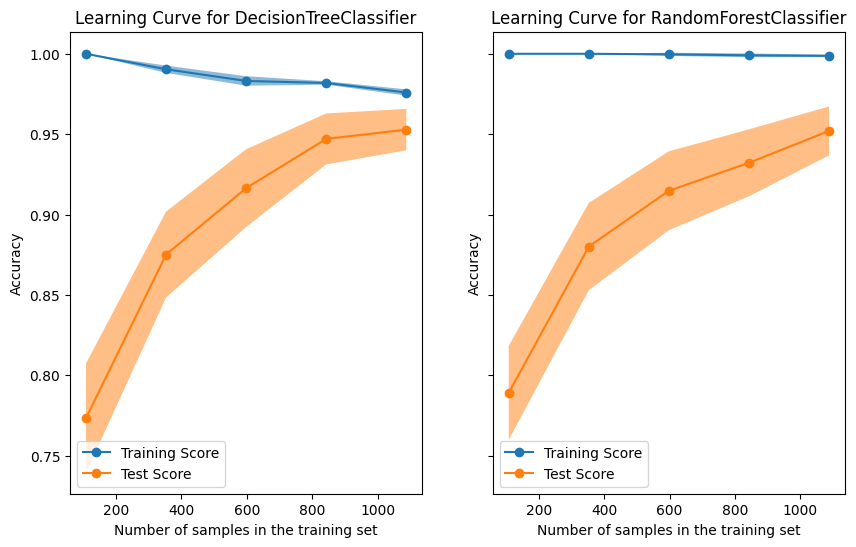

In [32]:
# Code from sklearn.learning_curve website

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": 10,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([clf1, rf]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [33]:
train_sizes1, train_scores1, val_scores1 = learning_curve(rf, X_train, y_train, cv=10, train_sizes=np.linspace(0.1,1.0,5),
                                                        scoring='accuracy')
tr_s_m = np.mean(train_scores1, axis=1)
tr_s_sd = np.std(train_scores1, axis=1)
te_s_m = np.mean(val_scores1, axis=1)
te_s_sd = np.std(val_scores1, axis=1)

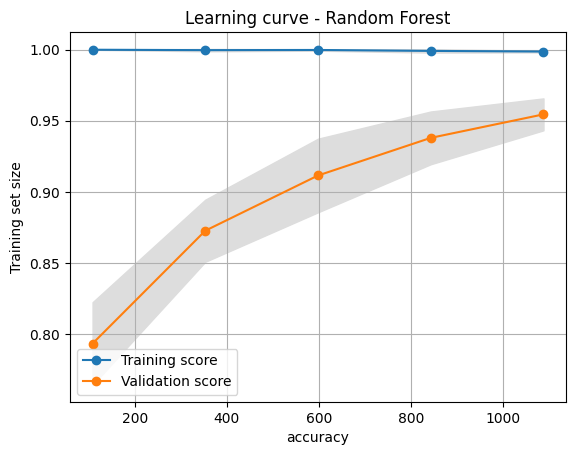

In [34]:
plt.plot(train_sizes1, tr_s_m, label='Training score', marker='o')
plt.plot(train_sizes1, te_s_m, label='Validation score', marker='o')

plt.fill_between(train_sizes1, tr_s_m-tr_s_sd, tr_s_m+tr_s_sd, color='#DDD')
plt.fill_between(train_sizes1, te_s_m-te_s_sd, te_s_m+te_s_sd, color='#DDD')

plt.xlabel('accuracy')
plt.ylabel('Training set size')
plt.title('Learning curve - Random Forest')
plt.grid()
plt.legend()
plt.show()

0.8860162656271005


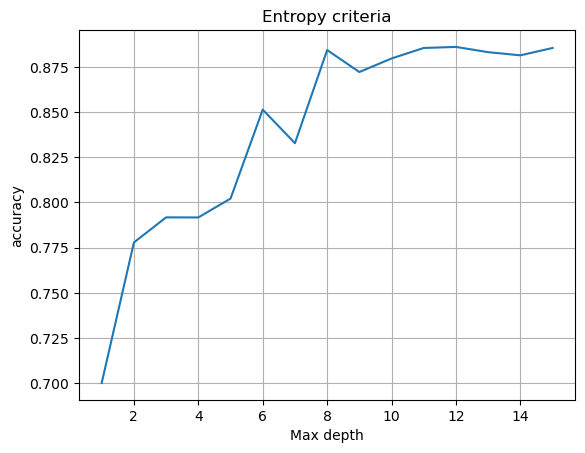

In [96]:
depth = np.arange(1,16,1)
acc_scores1 = []

for i in depth:
    clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    scores = cross_val_score(clf2, X, y, cv=10, scoring='accuracy')
    acc_scores1.append(np.mean(scores))

print(np.max(acc_scores1))
plt.plot(depth, acc_scores1)
plt.xlabel('Max depth')
plt.ylabel('accuracy')
plt.title('Entropy criteria')
plt.grid()
plt.show()

[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\ngini = 0.452\nsamples = 1209\nvalue = [266, 50, 852, 41]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 407\nvalue = [0, 0, 407, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.5\ngini = 0.576\nsamples = 802\nvalue = [266, 50, 445, 41]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 260\nvalue = [0, 0, 260, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.5\ngini = 0.628\nsamples = 542\nvalue = [266, 50, 185, 41]'),
 Text(0.5, 0.125, 'gini = 0.496\nsamples = 278\nvalue = [127, 0, 151, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.646\nsamples = 264\nvalue = [139, 50, 34, 41]')]

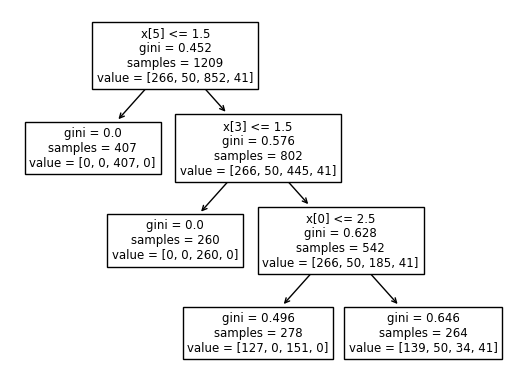

In [112]:
from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

## 2) AdaBoost Classifier

In [22]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
clf_boost = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=2)
clf_boost.fit(X_train, y_train)
y_pred_boost = clf_boost.predict(X_test)
print(accuracy_score(y_test,y_pred_boost))

0.7495183044315993


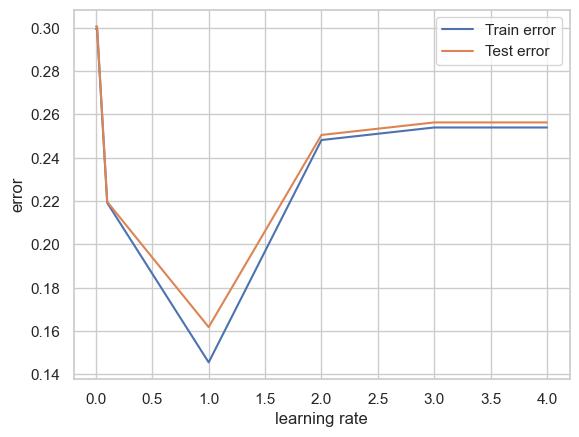

In [24]:
from sklearn.metrics import zero_one_loss

learning_rate = [0.001,0.01,0.1,1,2,3,4]
error_test = []
error_train = []

for i in range(0, len(learning_rate)):
    clf_ada = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=learning_rate[i])
    clf_ada.fit(X_train,y_train)
    
    error_test.append(zero_one_loss(y_test, clf_ada.predict(X_test)))
    error_train.append(zero_one_loss(y_train, clf_ada.predict(X_train)))
    
sns.set(style='whitegrid')

plt.plot(learning_rate, error_train, label='Train error')
plt.plot(learning_rate, error_test, label='Test error')
plt.xlabel('learning rate')
plt.ylabel('error')
plt.legend()
plt.show()

## 3) Gradient Boosting

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train,y_train)
y_pred=clf_gb.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9653179190751445


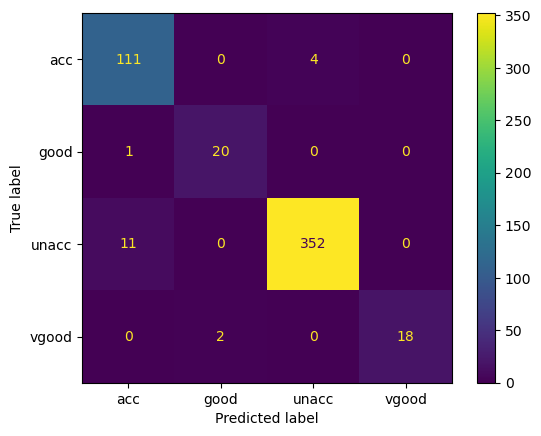

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

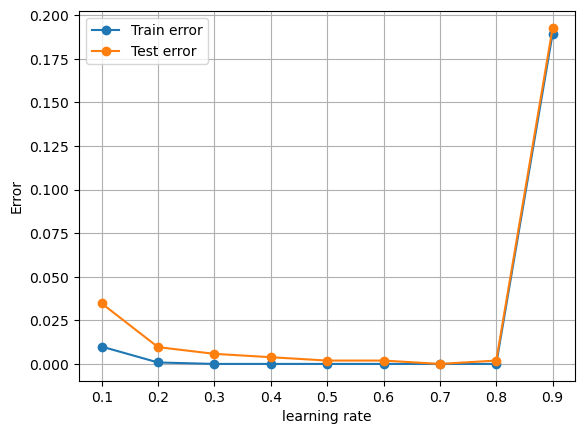

In [14]:
from sklearn.metrics import zero_one_loss

learning_rate = np.arange(0.1,1.0,0.1)
err_tr = []
err_te = []

for i in range(0,len(learning_rate)):
    clf_gb1 = GradientBoostingClassifier(learning_rate = learning_rate[i])
    clf_gb1.fit(X_train,y_train)
    
    err_tr.append(zero_one_loss(y_train, clf_gb1.predict(X_train)))
    err_te.append(zero_one_loss(y_test, clf_gb1.predict(X_test)))
    
plt.plot(learning_rate, err_tr, label='Train error', marker='o')
plt.plot(learning_rate, err_te, label='Test error', marker='o')
plt.xlabel('learning rate')
plt.ylabel('Error')
plt.grid()
plt.legend()
plt.show()

In [16]:
clf_gb2 = GradientBoostingClassifier(learning_rate=0.7)
clf_gb2.fit(X_train,y_train)
y_pred_gb2 = clf_gb2.predict(X_test)
print(accuracy_score(y_test, y_pred_gb2))

1.0


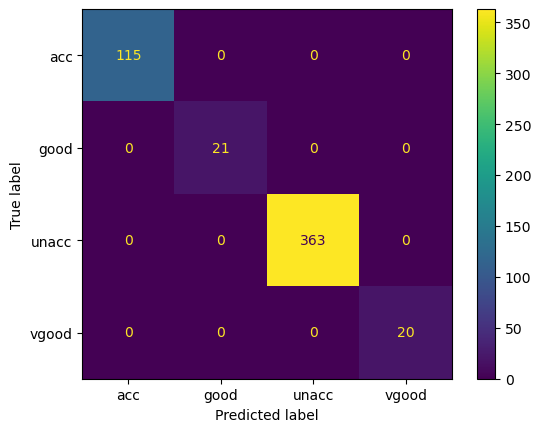

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gb2)

In [19]:
print(classification_report(y_test, y_pred_gb2))

              precision    recall  f1-score   support

         acc       1.00      1.00      1.00       115
        good       1.00      1.00      1.00        21
       unacc       1.00      1.00      1.00       363
       vgood       1.00      1.00      1.00        20

    accuracy                           1.00       519
   macro avg       1.00      1.00      1.00       519
weighted avg       1.00      1.00      1.00       519



In [18]:
train_sizes=np.linspace(0.1,1.0,5)
cv=10

def plot_learn_curve(estimator, X, y, train_sizes, cv):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X_train, y_train, train_sizes=train_sizes,
                                                           cv=cv, scoring='accuracy')
    tr_s_m = np.mean(train_scores, axis=1)
    val_s_m = np.mean(val_scores, axis=1)
    
    plt.plot(train_sizes, tr_s_m, label='Train score', marker='o')
    plt.plot(train_sizes, val_s_m, label='Validation score', marker='o')
    plt.xlabel('Training set size')
    plt.ylabel('accuracy')
    plt.title('Learning curve- ' +str(estimator).split('(')[0])
    plt.legend()

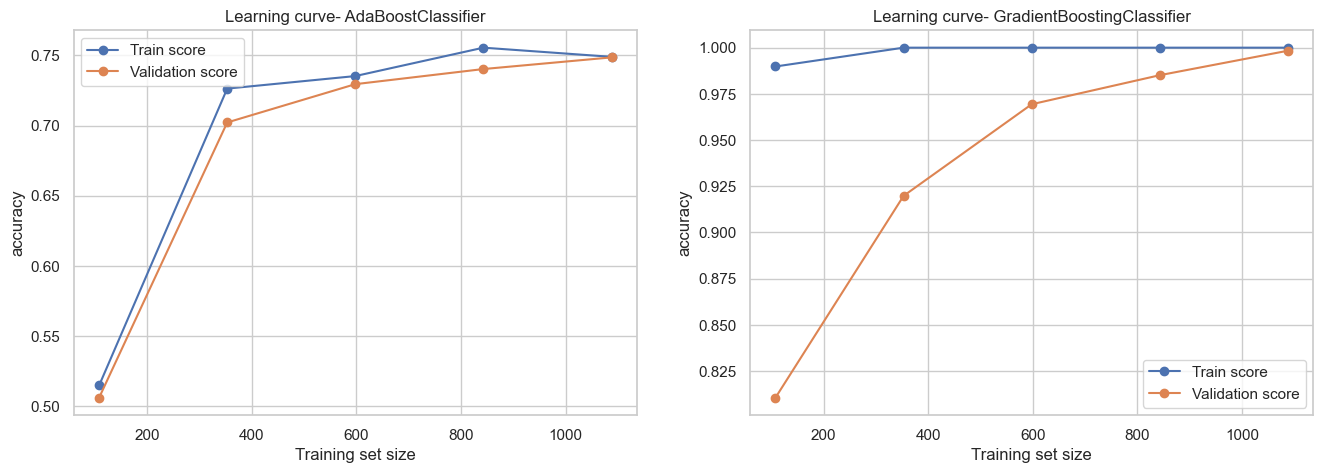

In [35]:
plt.figure(figsize=(16,5))

for model, i in [(clf_boost, 1), (clf_gb2, 2)]:
    plt.subplot(1,2,i)
    plot_learn_curve(model, X_train, y_train, train_sizes, cv)

In [37]:
pip install xgboost


     ---------------------------------------- 70.9/70.9 MB 3.2 MB/s eta 0:00:00


## 4) XGBoost Classifier

- Still need to work on this

In [1]:
from xgboost import XGBClassifier

In [10]:
from sklearn.preprocessing import LabelEncoder

X1_train = X_train.copy()
X1_test = X_test.copy()

label_encoder = LabelEncoder()
y1_train = label_encoder.fit_transform(y_train)
y1_test = label_encoder.transform(y_test)

In [18]:
clf_xgb = XGBClassifier(eta=0.2, gamma=5)
clf_xgb.fit(X1_train,y1_train)
y_pred_xgb = clf_xgb.predict(X1_test)
print(accuracy_score(y1_test, y_pred_xgb))

0.9152215799614644


## K nearest neighbors(KNN)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_test,y_pred_knn))

0.7302504816955684


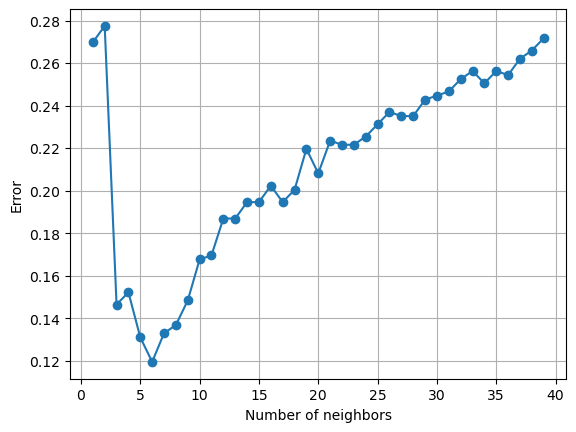

In [29]:
from sklearn.metrics import zero_one_loss

error = []

for i in range(1,40):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train,y_train)
    error.append(zero_one_loss(y_test, knn1.predict(X_test)))

plt.plot(range(1,40), error, marker='o')
plt.xlabel('Number of neighbors')
plt.ylabel('Error')
plt.grid()
plt.show()

In [30]:
knn2 = KNeighborsClassifier(n_neighbors=6)
knn2.fit(X_train,y_train)
y_pred_knn2 = knn2.predict(X_test)
print(accuracy_score(y_test, y_pred_knn2))

0.8805394990366089


# Artificial Neural Networks

In [2]:
from sklearn.neural_network import MLPClassifier

In [3]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score

In [11]:
clf_ann = MLPClassifier(max_iter=1000)
clf_ann.fit(X_train,y_train)
y_pred_ann = clf_ann.predict(X_test)
print(accuracy_score(y_test, y_pred_ann))

0.8901734104046243


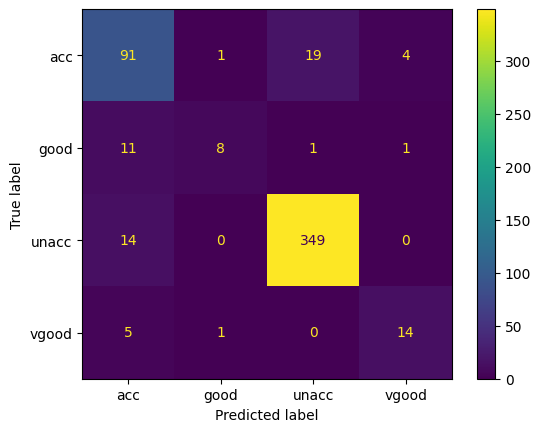

In [12]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_ann)

C:\Users\ysaru\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ysaru\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ysaru\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Text(0, 0.5, 'Error rate')

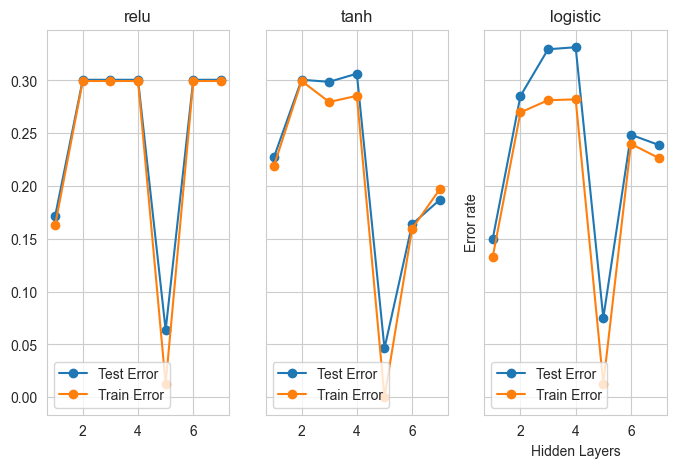

In [13]:
from sklearn.metrics import zero_one_loss

sns.set_style('whitegrid')
fig, axs = plt.subplots(1,3, figsize=(8,5), facecolor='w', edgecolor='k', sharex=True, sharey=True)

axs = axs.ravel()

layers = [(5), (2,3), (3,4), (4,3,4), (100,60), (5,2), (5,4)]
activation = ['relu', 'tanh', 'logistic']

for k in range (0, len(activation)):
    
    error_test = []
    error_train = []
    for i in layers:
        clf_ann1 = MLPClassifier(hidden_layer_sizes=i, activation=activation[k], solver='lbfgs', random_state=0)
        clf_ann1.fit(X_train,y_train)
        
        error_test.append(zero_one_loss(y_test, clf_ann1.predict(X_test)))
        error_train.append(zero_one_loss(y_train, clf_ann1.predict(X_train)))
        
    axs[k].plot(np.arange(1,8), error_test, label='Test Error', marker='o')
    axs[k].plot(np.arange(1,8), error_train, label='Train Error', marker='o')
    axs[k].set_title(activation[k])
    axs[k].legend()
    
plt.xlabel('Hidden Layers')
plt.ylabel('Error rate')

We choose tanh with layers (100,60), 5th element in the layers list

In [14]:
clf_ann3 = MLPClassifier(hidden_layer_sizes=(100,60), activation='tanh', max_iter=500, alpha=0.1, random_state=0)
clf_ann3.fit(X_train,y_train)
y_pred_ann3 = clf_ann3.predict(X_test)
print(accuracy_score(y_test,y_pred_ann3))

0.8805394990366089


Our give dataset is relatively small. ANN performs better on smaller datasets with the solver 'lbfgs' instead of the defualt 
solfer'adam'. We caan see the improvement in results below. Above we got accuracy of 0.88 with defualt solver and below the
accuracy improved tremendously to almost 1 when we used the solver 'lbfgs'

In [16]:
clf_ann2 = MLPClassifier(hidden_layer_sizes=(100,60), activation='tanh', solver='lbfgs', max_iter=1000, alpha=0.1, random_state=0)
clf_ann2.fit(X_train,y_train)
y_pred_ann2 = clf_ann2.predict(X_test)
print(accuracy_score(y_test,y_pred_ann2))

1.0


C:\Users\ysaru\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [17]:
import warnings
warnings.filterwarnings('ignore')

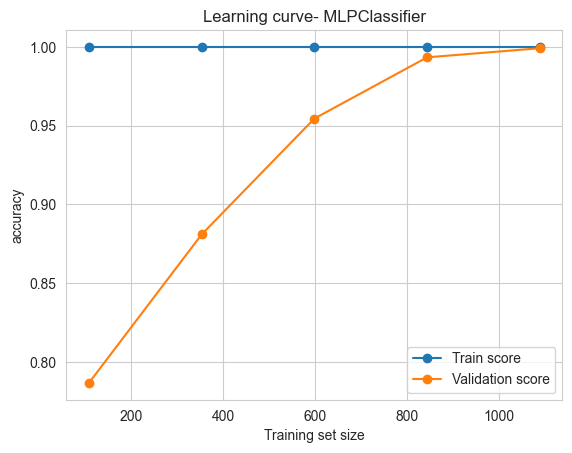

In [19]:
plot_learn_curve(clf_ann2, X_train, y_train, train_sizes, cv)

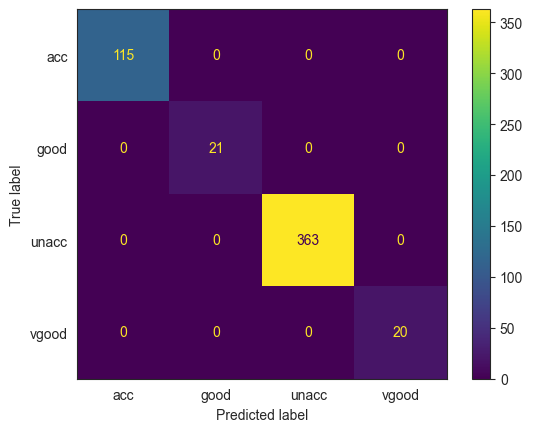

In [21]:
sns.set_style('white')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_ann2)

In [22]:
print(classification_report(y_test,y_pred_ann2))

              precision    recall  f1-score   support

         acc       1.00      1.00      1.00       115
        good       1.00      1.00      1.00        21
       unacc       1.00      1.00      1.00       363
       vgood       1.00      1.00      1.00        20

    accuracy                           1.00       519
   macro avg       1.00      1.00      1.00       519
weighted avg       1.00      1.00      1.00       519

